# Coinbase data statistic as justification for attribution methods

This notebook looks at coinbase data to justify certain attribution methods

### All imports

In [2]:
# python3.5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import binascii
import sys
import random # draw sample

import csv
import json

import os.path # os.path.isfile; 

### Global variables and functions

In [3]:
# data up to blockheight 
#current_blockheight = 471892
current_blockheight = 514240

### Input files

#### `bitcoin_coinbase_address_count__bheight-$(blockheight).csv`
All bitcoin blocks with **more than one coinbase output address** and their respective number of coinbase output addresses

csv file columns:
* **blockheight**: Bitcoin block height of this block with more than one coinbase output address
* **coinbase_addresses**: Number of coinbase output addresse for this block 

Internal information of how this dataset was extracted from our postgres db:
```sql

```

In [4]:
bitcoin_coinbase_address_count_csv_file = "./dataset/bitcoin_coinbase_address_count__bheight-" + str(current_blockheight) + ".csv"
assert( os.path.isfile(bitcoin_coinbase_address_count_csv_file) )

#### `bitcoin_coinbases_with_one_output_address__bheight-$(blockheight).csv`
This is the bitcoin coinbase data of all blocks that have been mined with only one address in the coinbase output and have occured more than once.

csv file columns:
* **height**: block height of block
* **hash**: hash of this block
* **address**: the one output address of the coinbase tx of this block
* **coinbase**: the coinbase filed as a hex string

In [5]:
bitcoin_coinbases_with_one_output_address_csv_file = "./dataset/bitcoin_coinbases_with_one_output_address__bheight-" + str(current_blockheight) + ".csv"
assert( os.path.isfile(bitcoin_coinbases_with_one_output_address_csv_file) )

#### `bitcoin_reused_coinbase_output_addresses__bheight-$(blockheight).csv`
Addresses that have been reused as (unique) coinbase outputs and how often they have been reused. 

csv file columns:
* **address**: the one output address of the coinbase tx of this block
* **blocks**: number of blocks with this single coinbase output address

In [6]:
bitcoin_reused_coinbase_output_addresses_csv_file = "./dataset/bitcoin_reused_coinbase_output_addresses__bheight-" + str(current_blockheight) + ".csv"
assert( os.path.isfile(bitcoin_reused_coinbase_output_addresses_csv_file) )

### Output files

In [7]:
# None

## Check data if mapping approaches are justifiable 

First, check how many blocks have more than one coinbase output address. 
As we will see, there are not that much compared to the overall number of blocks, so we can ignore them for now to be on the safe side. 

In [31]:
df = pd.read_csv(bitcoin_coinbase_address_count_csv_file)
type(df)

pandas.core.frame.DataFrame

In [32]:
df.columns

Index(['blockheight', 'coinbase_addresses'], dtype='object')

In [33]:
len(df) # number of blocks with more than one output address form the coinbase transaction

27387

In [44]:
len(df) * 0.9

24648.3

In [34]:
# percentage of block with one coinbase output
(len(df)/current_blockheight) * 100

5.325723397635345

In [35]:
for index, row in df.iterrows():
    print(row)
    break

blockheight           133471
coinbase_addresses       919
Name: 0, dtype: int64


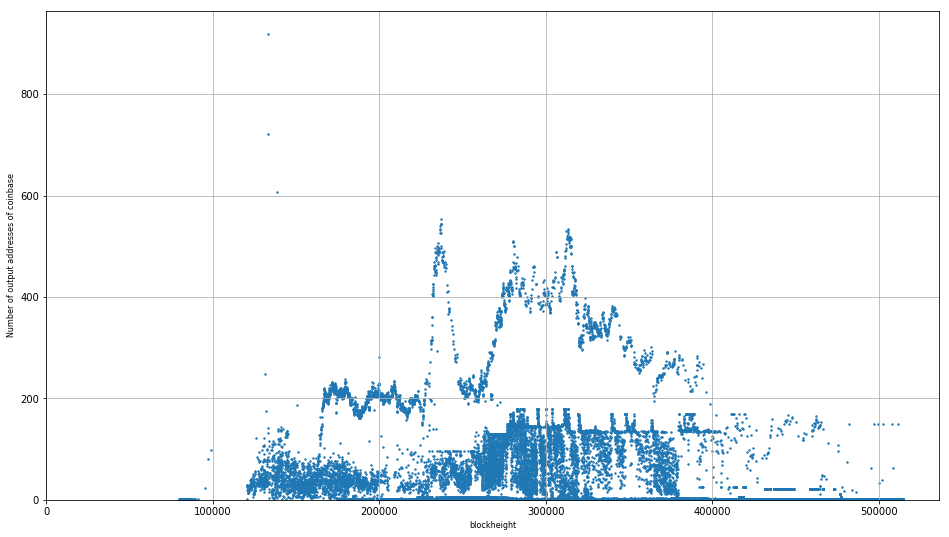

In [36]:
plt.figure(figsize=[16,9])
#plt.plot(df['blockheight'], df['coinbase_addresses'], label="coinbase outputs per block",  linestyle="-",linewidth=2)
plt.scatter(df['blockheight'], df['coinbase_addresses'], label="coinbase outputs per block", s=2)
plt.xlabel('blockheight', fontsize=8)
plt.ylabel('Number of output addresses of coinbase', fontsize=8)
xmin = 0
ymin = 0
xmax = None
ymax = None
plt.axis([xmin, ymax, ymin, ymax])
plt.grid()
plt.show()

In [42]:
df = df.sort_values(by=['blockheight'], ascending=True)

In [48]:
df.loc[[int(len(df)*0.9)]]

,blockheight,coinbase_addresses
24648,421480,2


24649


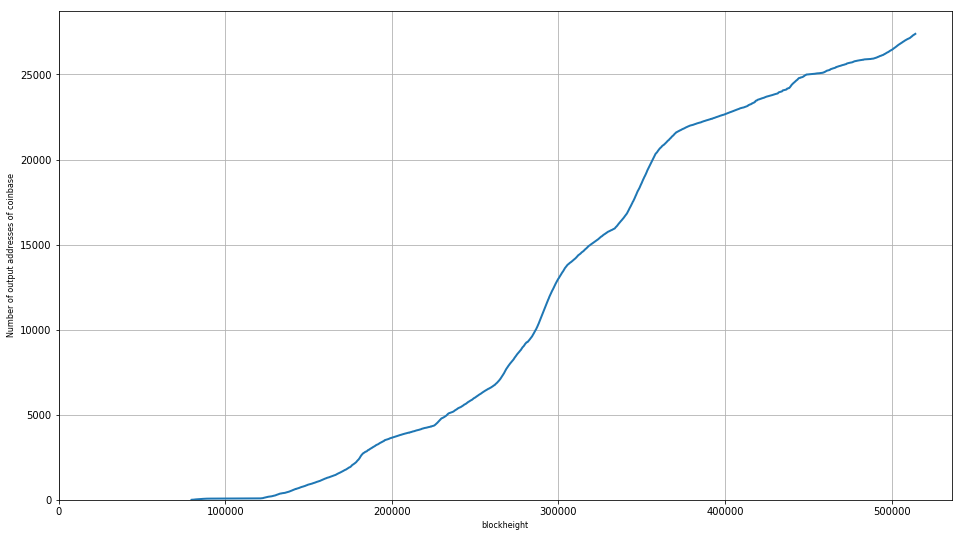

In [45]:
# distribution of multiple coinbase outputs over time 
plt.figure(figsize=[16,9])

list_nr_unique = list()
nr_unique = 0
for index,row in df.iterrows():
    nr_unique += 1
    list_nr_unique.append(nr_unique)
    

plt.plot(df['blockheight'], list_nr_unique, label="coinbase outputs per block",  linestyle="-",linewidth=2)
plt.xlabel('blockheight', fontsize=8)
plt.ylabel('Number of output addresses of coinbase', fontsize=8)
xmin = 0
ymin = 0
xmax = None
ymax = None
plt.axis([xmin, ymax, ymin, ymax])
plt.grid()
plt.show()

Second, check how often coinbase addresses, that occured as single address per coinbase output, are reused over the whole lifetime of Bitcoin

In [26]:
df = pd.read_csv(bitcoin_coinbases_with_one_output_address_csv_file)
len(df)

486849

In [27]:
df.columns

Index(['height', 'hash', 'address', 'coinbase'], dtype='object')

In [28]:
for index, row in df.iterrows():
    print(row)
    break

height                                                      0
hash        000000000019d6689c085ae165831e934ff763ae46a2a6...
address                    1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa
coinbase    04ffff001d0104455468652054696d65732030332f4a61...
Name: 0, dtype: object


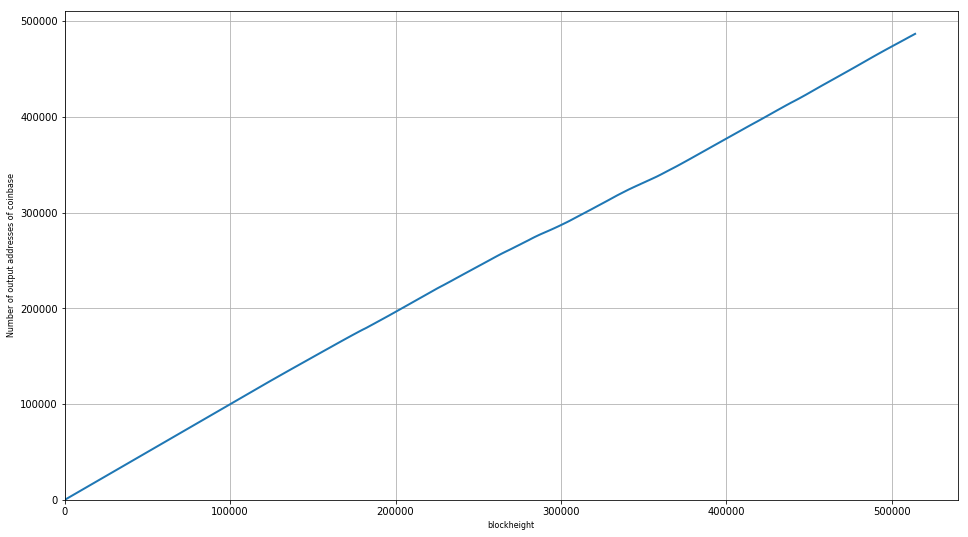

In [29]:
# distribution of single coinbase outputs over time 
plt.figure(figsize=[16,9])

list_nr_unique = list()
nr_unique = 0
for index,row in df.iterrows():
    nr_unique += 1
    list_nr_unique.append(nr_unique)

plt.plot(df['height'], list_nr_unique, label="coinbase outputs per block",  linestyle="-",linewidth=2)
plt.xlabel('blockheight', fontsize=8)
plt.ylabel('Number of output addresses of coinbase', fontsize=8)
xmin = 0
ymin = 0
xmax = None
ymax = None
plt.axis([xmin, ymax, ymin, ymax])
plt.grid()
plt.show()

In [19]:
unique_coinbase_oneout_addresses = df.address.unique()

p_uniq_cb = ( len(unique_coinbase_oneout_addresses)/ current_blockheight ) * 100
print("Number of unique coinbase output addresses: " + str(len(unique_coinbase_oneout_addresses)) )
print("Percent of single coinbase output addresses that is unique amongst all single coinbase outputs: " + str(p_uniq_cb))
print("Percent of single coinbase output addresses that is reused amongst all single coinbase outputs: " + str(100 - p_uniq_cb))

Number of unique coinbase output addresses: 194853
Percent of single coinbase output addresses that is unique amongst all single coinbase outputs: 37.89145146235221
Percent of single coinbase output addresses that is reused amongst all single coinbase outputs: 62.10854853764779


In [20]:
# top 10 reused addresses 
reused_coinbase_oneout_addresses = df.address.value_counts()
reused_coinbase_oneout_addresses[0:10]

1KFHE7w8BhaENAswwryaoccDb6qcT6DbYY    39944
14cZMQk89mRYQkDEj8Rn25AnGoBi5H6uer    26204
1CjPR7Z5ZSyWk6WtXvSFgkptmpoi4UM9BC    23083
152f1muMCNa7goXYhYAQC61hxEgGacmncB    15714
1CK6KHY6MHgYvmRQ4PAafKYDrg1ejbH1cE    10579
18cBEMRxXHqzWWCxZNtU91F5sbUNKhL5PX     7699
1BQLNJtMDKmMZ4PyqVFfRuBNvoGhjigBKF     7411
19PkHafEN18mquJ9ChwZt5YEFoCdPP5vYB     6447
1Hz96kJKF2HLPGY15JWLB5m9qGNxvt8tHJ     6312
15urYnyeJe3gwbGJ74wcX89Tz7ZtsFDVew     5603
Name: address, dtype: int64

In [21]:
u_df = df.drop_duplicates(subset="address")
len(u_df)

194853

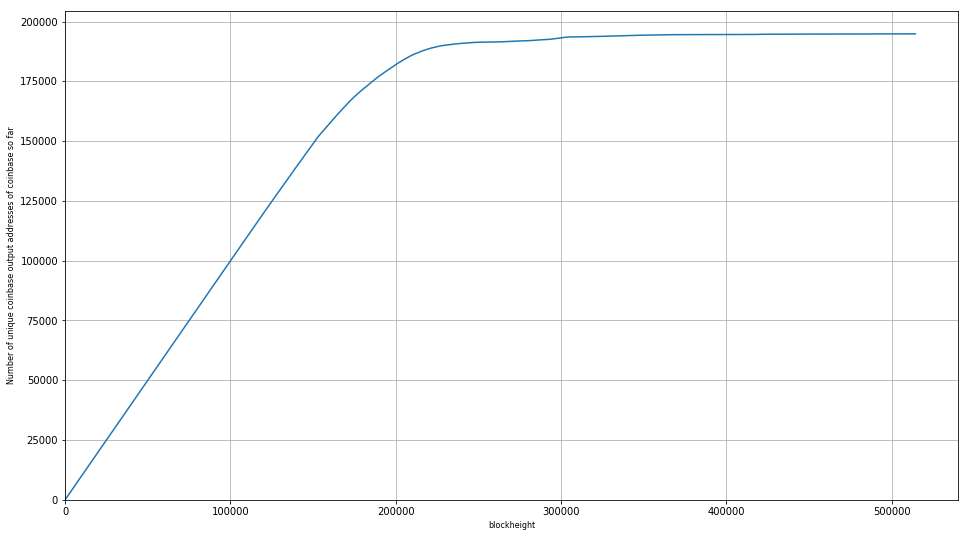

In [22]:
# check when the most unique coinbase outputs where used

plt.figure(figsize=[16,9])

plt.plot( u_df["height"], list( range( len(u_df) ) ), label="unique coinbase outputs over time")
plt.xlabel('blockheight', fontsize=8)
plt.ylabel('Number of unique coinbase output addresses of coinbase so far', fontsize=8)
xmin = 0
ymin = 0
xmax = None
ymax = None
plt.axis([xmin, ymax, ymin, ymax])
plt.grid()
plt.show()

In [23]:
late_df = np.split(df, [200000])[1]
#late_df
late_unique_coinbase_oneout_addresses = late_df.address.unique()

late_p_uniq_cb = ( len(late_unique_coinbase_oneout_addresses)/ current_blockheight ) * 100
print("Number of unique coinbase output addresses: " + str(len(late_unique_coinbase_oneout_addresses)) )
print("Percent of single coinbase output addresses that is unique amongst all single coinbase outputs: " + str(late_p_uniq_cb))
print("Percent of single coinbase output addresses that is reused amongst all single coinbase outputs: " + str(100 - late_p_uniq_cb))

Number of unique coinbase output addresses: 11304
Percent of single coinbase output addresses that is unique amongst all single coinbase outputs: 2.198195395146235
Percent of single coinbase output addresses that is reused amongst all single coinbase outputs: 97.80180460485377


So basically since pooled mining has become a thing, almost all unique coinbase output addresses have been reused